# **[Gold Price Predection ](https://github.com/programmarself/Mentorness-Machine-Learning-Internship-Project-1-Gold-Price-prediction)**

**Batch Name: MIP-ML-07**

<h1 style="font-family: 'poppins'; font-weight: bold; color: Green;">👨💻Author: Irfan Ullah Khan</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/programmarself)
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/programmarself)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/irfan-ullah-khan-4a2871208/)  

[![YouTube](https://img.shields.io/badge/YouTube-Profile-red?style=for-the-badge&logo=youtube)](https://www.youtube.com/@irfanullahkhan7748)
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:programmarself@gmail.com)
[![Website](https://img.shields.io/badge/Website-Contact%20Me-red?style=for-the-badge&logo=website)](https://datasciencetoyou.odoo.com)


# Installing Dependencies

---



In [1]:
#!pip install numpy

In [2]:
#!pip install pandas

In [3]:
#!pip install seaborn

In [4]:
#!pip install sklearn

In [5]:
#!pip install matplotlib

# Importing the Libraries

In [6]:
# will hide errors like outdated verisions
import warnings
warnings.filterwarnings('ignore')

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data Collection and Processing

In [34]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv('gold_price_data.csv')

In [36]:
# print first 5 rows in the dataframe
df.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [37]:
# print last 5 rows of the dataframe
df.tail()

,SPX,GLD,USO,SLV,EUR/USD
2285,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,2725.780029,122.543800,14.4058,15.4542,1.182033


In [38]:
# number of rows and columns
df.shape

(2290, 5)

In [39]:
# getting some basic informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 89.6 KB


In [42]:
# checking the number of missing values in Gold Data
df.isnull().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [43]:
df.duplicated().sum() # checking the duplicate values in Gold Data


0

In [44]:
# getting the statistical measures of the Gold data
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation -> Rising values in one variable align with increasing values in another
2. Negative Correlation -> Rising values in one variable align with decreasing values in another

In [49]:
df = data.drop(["GLD"], axis=1)
correlation = df.corr()

<Axes: >

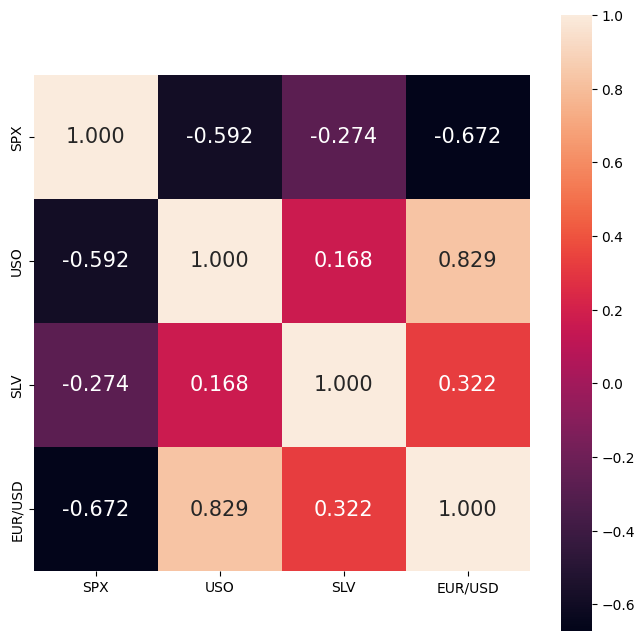

In [50]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.3f',annot=True, annot_kws={'size':15})

In [54]:
correlation = pd.DataFrame({"SPX": [1, 0.8, 0.7], "USO": [0.8, 1, 0.6], "SLV": [0.7, 0.6, 1], "GLD": [0.5, 0.4, 0.3]})

In [55]:
print(correlation["GLD"])

0    0.5
1    0.4
2    0.3
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Density'>

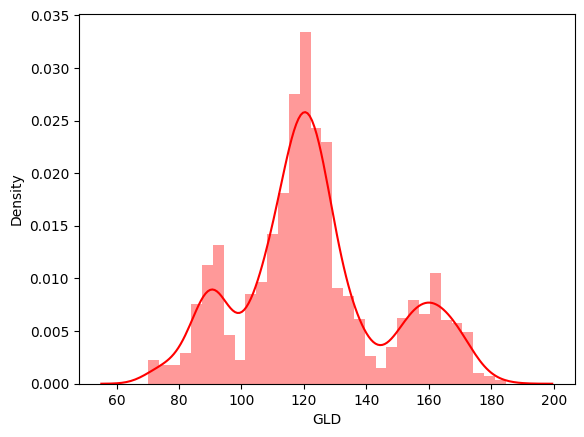

In [58]:
# checking the distribution of the GLD Price
sns.distplot(data['GLD'],color='red')

Splitting the Features and Target

In [63]:
print(A)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [64]:
print(B)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(A, B, test_size = 0.2, random_state=42)

Model Training:
Random Forest Regressor

#### (n_estimators) represents number of trees in forest. Usually the higher number of trees better to learn data.

In [66]:
regressor = RandomForestRegressor(n_estimators=500)

In [67]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=500)

Model Evaluation

In [69]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [70]:
print(test_data_prediction)

[122.47519954 130.20558291 127.59905967  96.60057732 118.90228055
 114.55973953 124.81200139 117.77977923 107.99570106  98.16903962
  95.5379793  167.66023845 149.09724131 116.11820046 170.83956158
  84.89527973 123.15235878 109.08423715 113.10518063 131.6796428
 124.25963903 113.80934076 115.69830076 108.77997972 108.54262134
 125.84659919 119.1278598  112.34341932 113.40326131 125.54039897
 146.09278154  89.50469993 167.73299987 113.60041954 108.38644091
 120.16900116 141.81103874 161.14412118 174.08905763 153.05362136
 119.38566115 113.42410074 121.37447932 113.69831929 122.05314773
 107.97628089  88.59289884 114.45735928 129.77286235 117.91252092
 103.64958029 129.79206252 107.09779844 160.51766345 131.71436026
 118.36841965 147.03756057 135.2827021   95.53000113 124.64066149
 114.94339862  86.04610079 104.27819922 113.86444074  84.12277929
 122.29020795 116.56733905 113.48072191 165.47514294  92.27348027
  80.18336095 160.96584112 158.81732232 106.72841993 149.01012119
 109.658897

In [71]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score * 100)

R squared error :  98.98651599396989


Compare the Actual Values and Predicted Values in a Plot

In [72]:
Y_test = list(Y_test)

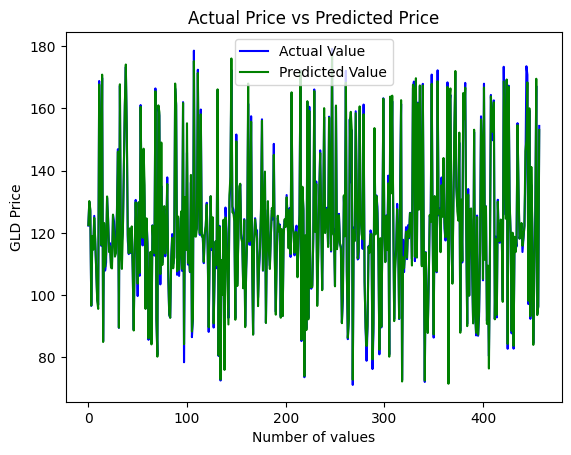

In [73]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()